In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator (rescale = 1./255, shear_range = 0.2, zoom_range = [.99, 1.01], brightness_range= [0.8, 1.2], data_format= "channels_last", fill_mode="constant", horizontal_flip = True)
test_datagen = ImageDataGenerator (rescale = 1./255)

In [3]:
training_set = train_datagen.flow_from_directory(r"C:\Users\pravi\OneDrive\Desktop\weather prediction\weather prediction project\dataset\train",target_size = (180, 180),batch_size = 64,class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(r"C:\Users\pravi\OneDrive\Desktop\weather prediction\weather prediction project\dataset\train",target_size = (180, 180),batch_size = 64,class_mode = 'categorical')

Found 1200 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.


In [4]:
VGG19 = VGG19(input_shape=[180,180]+ [3], weights='imagenet',include_top=False)
for layer in VGG19.layers: layer.trainable = False
x = Flatten() (VGG19.output)

In [5]:
#Adding Dense Layers
prediction = Dense(5, activation = 'softmax')(x)

In [6]:
model = Model(inputs = VGG19.input, outputs=prediction)


In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │        64,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,088,389 (76.63 MB)

 Trainable params: 64,005 (250.02 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [8]:
# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [9]:

#Train The Model
r = model.fit(
     training_set,
     epochs=50,
     steps_per_epoch=len(training_set)
)

Epoch 1/50


c:\Users\pravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.3327 - loss: 1.6306
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50


c:\Users\pravi\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


19/19 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.7761 - loss: 0.6762
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.8308 - loss: 0.5347
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.8696 - loss: 0.4340
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 94s 5s/step - accuracy: 0.9047 - loss: 0.3546
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.9095 - loss: 0.3251
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - accuracy: 0.9243 - loss: 0.2560
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0

In [10]:
loss, accuracy = model.evaluate(test_set, steps=len(test_set), verbose=2)
print(f'Model performance on test images:\nAccuracy = {accuracy}\nLoss = {loss}')


19/19 - 60s - 3s/step - accuracy: 0.9892 - loss: 0.0900
Model performance on test images:
Accuracy = 0.9891666769981384
Loss = 0.09003172069787979


In [11]:
model.save('model.h5')

In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model=load_model(r"C:\Users\pravi\OneDrive\Desktop\weather prediction\weather prediction project\model.h5")

In [13]:
img = image.load_img(r"C:\Users\pravi\OneDrive\Desktop\weather prediction\weather prediction project\dataset\test\foggy\foggy4.jpeg", target_size=(180, 180)) # loading the image
X = image.img_to_array(img) # convert the image to an array
X = np.expand_dims(X, axis=0) # expand the dimensions of the array
preds = model.predict(X)
pred = np.argmax(preds, axis=1)
index = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
result = str(index[pred[0]])
result


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


'foggy'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


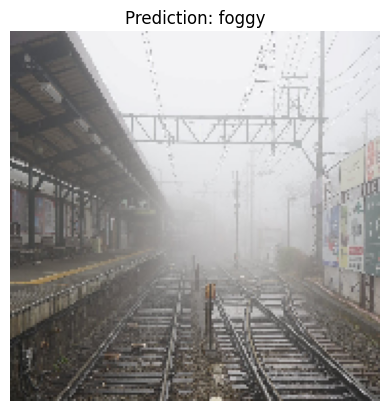

In [14]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = r"C:\Users\pravi\OneDrive\Desktop\weather prediction\weather prediction project\dataset\test\foggy\foggy4.jpeg"
img = image.load_img(img_path, target_size=(180, 180))
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)

# Normalize the image array if needed (common for many models)
X = X / 255.0

# Load the pre-trained model (make sure the path to your model is correct)
model = load_model(r'C:\Users\pravi\OneDrive\Desktop\weather prediction\weather prediction project\model.h5')


# Make prediction
preds = model.predict(X)
pred = np.argmax(preds, axis=1)

# Define the labels
index = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']

# Get the prediction result
result = str(index[pred[0]])

# Display the image and the prediction result
plt.imshow(img)
plt.title(f"Prediction: {result}")
plt.axis('off')  # Hide axes
plt.show()


In [15]:
pip install flask

   ---------------------------------------- 0.0/101.7 kB ? eta -:--:--
   ------------ --------------------------- 30.7/101.7 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 101.7/101.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------------------------------- 97.9/97.9 kB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!tar -zcvf modelWeights.tgz model.h5

model.h5
